<a href="https://colab.research.google.com/github/anesu-rirwa/anesurirwa/blob/main/fifa_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## ANESU RIRWA
## R204432D
## Artificial Intelligence And Machine Learning (HAI)
## HAI203

In [ ]:
import matplotlib.pyplot as plt
import types
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df_data = pd.read_csv('players_20.csv')

df

0        False
1        False
2        False
3        False
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Length: 18278, dtype: bool

In [ ]:
#Data Cleaning

df_fifa = df_data[['short_name', 'age', 'overall', 'potential','nationality', 'club', 'value_eur']]
df_fifa.drop_duplicates(inplace = True)
df_fifa.head()

,short_name,age,overall,potential,nationality,club,value_eur
0,L. Messi,32,94,94,Argentina,FC Barcelona,95500000
1,Cristiano Ronaldo,34,93,93,Portugal,Juventus,58500000
2,Neymar Jr,27,92,92,Brazil,Paris Saint-Germain,105500000
3,J. Oblak,26,91,93,Slovenia,Atlético Madrid,77500000
4,E. Hazard,28,91,91,Belgium,Real Madrid,90000000


In [ ]:
# DATA EXPLORATION
df_fifa.corr()

,age,overall,potential,value_eur
age,1.000000,0.464305,-0.262872,0.081513
overall,0.464305,1.000000,0.646650,0.638230
potential,-0.262872,0.646650,1.000000,0.580868
value_eur,0.081513,0.638230,0.580868,1.000000


In [ ]:
df_fifa.describe()

,age,overall,potential,value_eur
count,18278.000000,18278.000000,18278.000000,1.827800e+04
mean,25.283291,66.244994,71.546887,2.484038e+06
std,4.656964,6.949953,6.139669,5.585481e+06
min,16.000000,48.000000,49.000000,0.000000e+00
25%,22.000000,62.000000,67.000000,3.250000e+05
50%,25.000000,66.000000,71.000000,7.000000e+05
75%,29.000000,71.000000,75.000000,2.100000e+06
max,42.000000,94.000000,95.000000,1.055000e+08


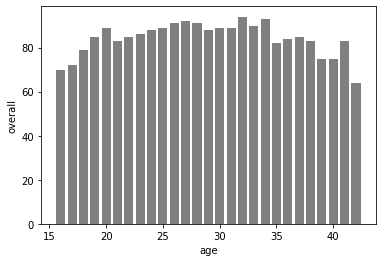

In [ ]:
plt.bar('age', 'overall', data = df_fifa, color = 'grey')
plt.xlabel('age')
plt.ylabel('overall')
plt.show()

In [ ]:
line1 = linear_model.LinearRegression()

In [ ]:
df_Potential = df_fifa.loc[:, 'potential'].values.reshape(-1, 1)
df_Overall = df_fifa.loc[:, 'overall'].values.reshape(-1, 1)

In [ ]:
line1.fit(df_Potential, df_Overall)
pred1 = line1.predict(df_Potential)

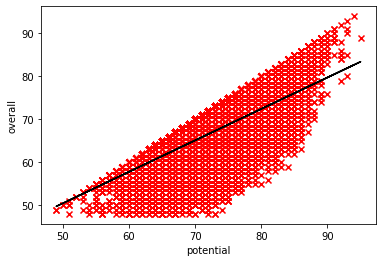

In [ ]:
plt.scatter('potential', 'overall', data = df_fifa, marker = 'x', color = 'red')
plt.xlabel('potential')
plt.ylabel('overall')
plt.plot(df_Potential, pred1, color='black')
plt.show()

In [ ]:
#Modelling
import numpy as np
split = np.random.rand(len(df_fifa)) < 0.75
train = df_fifa[split]
test = df_fifa[~split]

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
#Training the model

fifa_x_train = train[['age', 'potential']]
fifa_y_train = train[['overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)

regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression()

In [ ]:
#Testing the model
fifa_x_test = test[['age', 'potential']]
fifa_y_test = test[['overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [ ]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [ ]:
r2_score(fifa_y_test, df_fifa_pred)

0.9514679724489707

In [ ]:
fifa_x_test['Predicted Rating'] = df_fifa_pred

<ipython-input-147-d8d74df567ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_x_test['Predicted Rating'] = df_fifa_pred


In [ ]:
df_fifa1 = pd.merge(df_fifa, fifa_x_test)
df_fifa1.head(20)

,short_name,age,overall,potential,nationality,club,value_eur,Predicted Rating
0,J. Oblak,26,91,93,Slovenia,Atlético Madrid,77500000,92.305495
1,E. Hazard,28,91,91,Belgium,Real Madrid,90000000,90.741603
2,K. De Bruyne,28,91,91,Belgium,Manchester City,90000000,90.741603
3,K. Koulibaly,28,89,91,Senegal,Napoli,67500000,90.741603
4,M. ter Stegen,27,90,93,Germany,FC Barcelona,67500000,92.836008
5,M. Salah,27,90,90,Egypt,Liverpool,80500000,89.131651
6,S. Agüero,31,89,89,Argentina,Manchester City,60000000,88.841977
7,Sergio Ramos,33,89,89,Spain,Real Madrid,31500000,88.631219
8,L. Suárez,32,89,89,Uruguay,FC Barcelona,53000000,88.746881
9,A. Griezmann,28,89,89,France,FC Barcelona,69000000,88.455844


In [ ]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)

In [ ]:
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

<ipython-input-150-4d951c4ffcc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_x_train['Predicted Ratings'] = df_fifa_pred2


In [ ]:
df_fifa2 = pd.merge(df_fifa, fifa_x_train)
df_fifa2.drop_duplicates(inplace = True)
df_fifa2.head(20)

,short_name,age,overall,potential,nationality,club,value_eur,Predicted Ratings
0,L. Messi,32,94,94,Argentina,FC Barcelona,95500000,94.195732
1,Cristiano Ronaldo,34,93,93,Portugal,Juventus,58500000,92.884994
2,Neymar Jr,27,92,92,Brazil,Paris Saint-Germain,105500000,91.563363
3,E. Hazard,28,91,91,Belgium,Real Madrid,90000000,90.741603
5,K. De Bruyne,28,91,91,Belgium,Manchester City,90000000,90.741603
7,K. Koulibaly,28,89,91,Senegal,Napoli,67500000,90.741603
9,V. van Dijk,27,90,91,Netherlands,Liverpool,78000000,90.329751
10,L. Modrić,33,90,90,Croatia,Real Madrid,45000000,89.668180
11,K. Mbappé,20,89,95,France,Paris Saint-Germain,93500000,87.949913
12,H. Kane,25,89,91,England,Tottenham Hotspur,83000000,88.834408
